# Transformermodellen for prediksjon av sekvenser

In [2]:
import numpy as np
import matplotlib.pyplot as plt

OPPGAVE 1.1

For å trene en transformermodell så trenger vi et datasett som består at flere x og y vektorer, $ D = \{ (x_0, y_0), (x_1, y_1), \ldots, (x_{n-1}, y_{n-1}) \} $. For å vise et eksempel på et av punktene i datasettet, $(x_0, y_0)$, velger vi $r = 2$, $a = 43$, $b = 7$, $c = 18$ og $d = a \cdot b + c = 319$. Vektoren $x_0$ er bygget opp slik at vi får de $r$ første sifferene av $a$, $b$, $c$ og $d$ og lengden til $x_i$ blir dermed $4 \cdot r$. I dette tilfellet får vi da $x_0 = [4, 3, 0, 7, 8, 3, 1]$. $y_0 $ består av alle sifferene til $d$ og blir her $y_0 = [3, 1, 9]$.  

OPPGAVE 1.2


Vi skal  nå anta at optimeringen er ferdig og at vi har funnet parametrene ${\theta}$ som minimerer objektfunksjonen $\mathscr{L}$, vi skal dermed bruke modellen $f_{\theta}$ til å predikere $d$ gitt $a, b$ og $c$. Modellen $f_{\theta}$ skal testes på en sekvens som bare inneholder tallene til $a, b,$ og $c$ og vi befinner oss i testfasen. I testfasen skal $x\in \mathbb{Z^{2r}}$, ved å kjøre $x$ gjennom modellen skal vi få ut som gir ut $f_{\theta}(x) = \hat{z}$ der $\hat{z}\in \mathbb{Z^{2r}}$, altså vi skal få ut en sekvens av samme dimensjon som sekvensen som puttes inn.

Vi har fortsatt $r = 2$, $a = 43$, $b = 7$ og $c = 18$ og skal predikere $d$. For å predikere $d\in \mathbb{Z^{r+1}}$ skal hver evaluering av modellen predikerer neste sifferet i sekvensen  og legger det til bakerst i $x$, dette blir input neste prediksjon helt til det er predikert $r+1$ nye heltall som ideelt sett skal være lik $d$. 


Vi ønsker å finne ${\theta}$ slik at $\hat{y} = [\hat{z_5}, \hat{z_6}, \hat{z_7}] = [3, 1, 9]$


Vi starter med første sekvens, $x^{(0)} = [4,3,0,7,1,8]$, og setter inn i modellen $f_{\theta}([4,3,0,7,1,8]) = [\hat{z_0}^{(0)}, \hat{z_1}^{(0)},..., \hat{z_5}^{(0)}]$ 

Legger til bakerste siffer fra outputten inn i neste sekvens: $x^{(1)} = [4,3,0,7,1,8, \hat{z_5}^{(0)}]$. Predikerer neste sekvens: $f_{\theta}([4,3,0,7,1,8, \hat{z_5}^{(0)}]) = [\hat{z_0}^{(1)}, \hat{z_1}^{(1)},..., \hat{z_6}^{(1)}]$ 

Gjentar prosessen: $x^{(2)} = [4,3,0,7,1,8, \hat{z_5}^{(0)}, \hat{z_6}^{(1)}]$, $f_{\theta}([4,3,0,7,1,8, \hat{z_5}^{(0)}], \hat{z_6}^{(1)}) = [\hat{z_0}^{(2)}, \hat{z_1}^{(2)},..., \hat{z_7}^{(2)}]$

Etter $3$ evalueringer av modellen ender vi opp med sekvensen: $x^{(3)} = [4,3,0,7,1,8, \hat{z_5}^{(0)}, \hat{z_6}^{(1)}, \hat{z_7}^{(2)}]$

Det er nå predikert $r + 1 = 3$ nye heltall, $\hat{y} = [\hat{z_5}^{(0)}, \hat{z_6}^{(1)}, \hat{z_7}^{(2)}]$. Nå kan vi sammenligneden predikerte $\hat{y}$ med vår $y_0 = [3, 1, 9]$. Dersom vi antar at modellen vår er godt trent skal dette stemme $\hat{z} = \hat{y} = y = [3,1,9]$.

OPPGAVE 1.3

Anta at vi bruker cross-entropy som objektfunksjon, at $m = 5$ og $y = [4, 3, 2, 1]$.

Hvilke diskret sannsynlighetsfordeling $\hat{Y}$ ville gitt en objektfunksjon $\mathscr{L}({\theta},D) = 0 $?

Hva ville ${\hat{y}}$ vært i dette tilfellet?

Ved å bruke cross-entropy funksjonen $\mathscr{L}({\theta},D)$ som loss funksjon og setter denne lik $0$ antar vi at modellen vår er en perfekt prediksjon. Dersom $\hat{Y} = F_{\theta}(x) = onehot(y)$ får vi nettopp dette få $\mathscr{L}({\theta},D) = 0$. Dette betyr også at $\hat{y} = argmax_{col}(F_{\theta}(x))$

Får oppgitt $m = 5$ og $y = [4, 3, 2, 1]$ får vi:

\begin{equation}

onehot(y) = onehot([4, 3, 2, 1]) := \begin{bmatrix} 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\\end{bmatrix} = \hat{Y}

\end{equation}

Fordelingen til $\hat{Y}$ tilsvarer en coloumnwise onehot distribution. $1$ representerer den korekte indeksen, ellers er det fyllt med $0$. 
Setter inn for $y$ i $argmax$

$\hat{y} = argmax_{col}(F_{\theta}(x)) = argmax_{col}\begin{bmatrix} 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\\end{bmatrix} = [4,3,2,1]$


$F_{\theta}(x)$ tilfredstiller kravene over $m = 5$ utfall og at $\hat{y}$ er en sekvens med lengde $n = 4$ med heltatt opp til $m- 1 = 5 - 1 = 4$



OPPGAVE 1.4

Gitt $d, m, n_{max}, k, p$ og $L$ så skal vi nå beregne hvor mange enkeltparametere, $w \in \mathbb{R}$, vi må bestemme ved optimering. For å finne dette må vi summere opp enkeltparameterene i alle parametermatrisene. Gitt

$\theta = {W_E, W_P, W_U, {{W_O}^{(l)}, {W_V}^{(l)}, {W_Q}^{(l)}, {W_K}^{(l)}, {W_1}^{(l)}, {W_2}^{(l)}}_{l=0}^{L-1}}$

Dimensjonen til $W_E$ og $W_U$ er $d \times m$, dimensjonen til $W_P$ er $d \times n_{max}$ , dimensjonen til ${W_O}^{(l)}, {W_V}^{(l)}, {W_Q}^{(l)}$ og ${W_K}^{(l)}$ er $k \times d$ og dimensjonen til ${W_1}^{(l)}$ og ${W_2}^{(l)}$ er $p \times d$. 

Vi får da totalt $w = 2dm + dn_{max} + (4kd + 2pd) \cdot L$ enkeltparametere som vi kan optimere.

OPPGAVE 1.5

$n = n_{max} = 1$, $m = d = k = p = 2$, $L = 1 \rightarrow l = 0,..., L-1 = 0$ 

$W_{O} = W_{V} = W_{Q} = W_{K} = W_{1} = W_{2} = W_{u} = I_{2x2} = \begin{bmatrix} 1 & 0 \\ 0 & 1\\\end{bmatrix} $

$\sigma(x) = \text{Relu}(x) = \max(0, x)$

$ W_{E} = \begin{bmatrix} 1 & 0 \\ 0 & \alpha \end{bmatrix}$

$ W_{p} = \begin{bmatrix} 1 \\ 0\\\end{bmatrix}$

Skal vise at vi må ha $\alpha > 1$ for å få $\hat{z} = [1]$ som output når input er $x = [1]$

$D\in{\mathbb{R}^{1\times1}}$ er null på øver triangulær inkludert diagonalen, $n = 1$ gir $D = [0]$

##### (4):
I likning $(4)$  $X = onehot(x)$ tar vi inn en vektor $x$ der $x\in{\mathbb{Z}^{1}}$ og får ut en matrise $X$ der $X\in{\mathbb{Z}^{2\times1}}$

$X = onehot([1]) = \begin{bmatrix} 0 \\ 1\\\end{bmatrix}$ $X\in{\mathbb{Z}^{2\times1}}$

##### (5)
I likning $(5)$  $z_{0} = W_{E}X + [W_{p}]_{0:n}$ tar vi inn matrisen $X$ fra likning $(4)$ og får ut en matrise $z_{0}$ der $z_{0}\in{\mathbb{R}^{2 \times 1}}$

$z_{0} = \begin{bmatrix} 1 & 0 \\ 0 & \alpha \\\end{bmatrix} \cdot \begin{bmatrix} 0 \\ 1\\\end{bmatrix} + \begin{bmatrix} 1 \\ 0\\\end{bmatrix} = \begin{bmatrix} 0 \\ \alpha\\\end{bmatrix} + \begin{bmatrix} 0 \\ 1\\\end{bmatrix} = \begin{bmatrix} 1 \\ \alpha\\\end{bmatrix}$

##### (6)
I likning $(6)$  $z_{\frac{1}{2}} = f_{0}^{A}(z_{0}) = z_{0} + W_{0}^{T} W_{V} z_{0} A(z_{0})$ får vi ut en matrise av dimensjon $z_{0}\in{\mathbb{R}^{2 \times 1}}$

For å finne denne må vi første finne Softmax av $z_{0}$ Det gjør vi ved likning (3) $ A(z_{0}) = softmax_{col}(z_{0}^{T} W_{Q}^{T} W_{k} z_{0} + D)$


$A(\begin{bmatrix} 1 \\ \alpha \\\end{bmatrix}) = softmax_{col}(\begin{bmatrix} 1 & \alpha \\\end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & 1 \\\end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & 1 \\\end{bmatrix} \begin{bmatrix} 1 \\ \alpha\\\end{bmatrix} + [0]) = softmax_{col}(\begin{bmatrix} 1 & \alpha \\\end{bmatrix} \begin{bmatrix} 1 \\ \alpha \\\end{bmatrix} + [0]) = softmax_{col}([\alpha^{2} + 1] + [0]) = softmax_{col}([\alpha^{2} + 1]) = \frac{\exp^{1 + \alpha^2}}{\exp^{1 + \alpha^2}} = 1$

Setter inn in likning (6):


$z_{\frac{1}{2}} = f_{0}^{A}(z_{0}) = \begin{bmatrix} 1 \\ \alpha \\ \end{bmatrix} + \begin{bmatrix} 1&0\\0&1\\\end{bmatrix} \begin{bmatrix} 1&0\\0&1\\\end{bmatrix} \begin{bmatrix} 1 \\ \alpha \\ \end{bmatrix} A(\begin{bmatrix} 1 \\ \alpha \\ \end{bmatrix}) = \begin{bmatrix} 1 \\ \alpha \\ \end{bmatrix} + \begin{bmatrix} 1 \\ \alpha \\ \end{bmatrix} = \begin{bmatrix} 2 \\ 2 \alpha \\ \end{bmatrix}$

##### (7)
I likning $(7)$  $z_{1} = f_{0}^{F}(z_{\frac{1}{2}}) = z_{\frac{1}{2}} + W_{2}^{T} \sigma(W_{1}z_{\frac{1}{2}})$ skal vi få ut en matrise av dimensjon $z_{1}\in{\mathbb{R}^{2\times1}}$

$z_{1} = f_{0}^{F}(z_{\frac{1}{2}}) = \begin{bmatrix} 2 \\ 2 \alpha \\\end{bmatrix} + \begin{bmatrix} 1&0\\0&1\\\end{bmatrix} \sigma (\begin{bmatrix}2\\2\alpha\\\end{bmatrix}) = \begin{bmatrix}2\\2\alpha\\\end{bmatrix} + max(0,\begin{bmatrix}2\\2\alpha\\\end{bmatrix})$

Her får vi to forskjellige utfall:

For $\alpha > 0$ har vi at $\begin{bmatrix}2\\2\alpha\\\end{bmatrix} + max(0,\begin{bmatrix}2\\2\alpha\\\end{bmatrix}) = \begin{bmatrix}2\\2\alpha\\\end{bmatrix} + \begin{bmatrix}2\\2\alpha\\\end{bmatrix} = \begin{bmatrix}4\\4\alpha\\\end{bmatrix}$

For $\alpha < 0$ har vi at $\begin{bmatrix}2\\2\alpha\\\end{bmatrix} + max(0,\begin{bmatrix}2\\2\alpha\\\end{bmatrix}) = \begin{bmatrix}2\\2\alpha\\\end{bmatrix} + \begin{bmatrix}2\\0\\\end{bmatrix} = \begin{bmatrix}4\\2\alpha\\\end{bmatrix}$

##### (8)
I likning $(8)$  $Z = softmax_{col}(W_{U}^{T}z_{L})$ får vi ut en matrise av dimensjon $Z\in{\mathbb{R}^{2\times1}}$

For $\alpha > 0: softmax_{col}(\begin{bmatrix}4\\4\alpha\\\end{bmatrix}) = \begin{bmatrix}  \frac{e^{4}}{e^{4} + e^{4\alpha}} \\  \frac{e^{4\alpha}}{e^{4} + e^{4\alpha}} \\\end{bmatrix}$

For $\alpha < 0: softmax_{col}(\begin{bmatrix}4\\2\alpha\\\end{bmatrix}) = \begin{bmatrix} \frac{e^{4}}{e^{4} + e^{2\alpha}} \\ \frac{e^{2\alpha}}{e^{4} + e^{2\alpha}} \\\end{bmatrix}$

##### (9)
I likning $(9)$ $\hat{z} = argmax_{col}(Z)$ får vi ut $\hat{z}\in(\mathbb{Z}^{1})$

For $\alpha > 0: argmax_{col}(\begin{bmatrix}  \frac{e^{4}}{e^{4} + e^{4\alpha}} \\  \frac{e^{4\alpha}}{e^{4} + e^{4\alpha}} \\\end{bmatrix})$

For $\alpha < 0: argmax_{col}(\begin{bmatrix}  \frac{e^{4}}{e^{4} + e^{2\alpha}} \\  \frac{e^{2\alpha}}{e^{4} + e^{2\alpha}} \\\end{bmatrix})$

For at $\hat{z} = 1$ må vi ha at det nederste elementet i vektoren være størst, altså:
$\frac{e^{4\alpha}}{e^{4} + e^{4\alpha}} > \frac{e^{4}}{e^{4} + e^{4\alpha}}$ $\rightarrow$ $\alpha > 1$

For det andre tilfelle får vi at $\alpha > 2$, men vi har bestemt fra før at $\alpha < 0$, vi får dermed $L = Ø$
Vi har dermed at $\alpha > 1$ for at $\hat{z} = 1$ $\blacksquare$


#### Oppgave 3.2
Printer gjennomsnittet av objektfunskjonen(losset) over batchene :
$\mathscr{L}^{j} = \frac{1}{B}  \sum_{k=0}^{B-1}\mathscr{L}^{j}_{k}$

Losset skal bli mindre for hver iterasjon

100%|██████████| 100/100 [00:09<00:00, 11.06it/s]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[0.50887136 0.50844766 0.50815621 0.50770843 0.50737499 0.50693492
 0.50664185 0.50617004 0.50586809 0.50547875 0.50511881 0.50480328
 0.50441631 0.50418503 0.50374776 0.50353349 0.50318229 0.5028942
 0.50254355 0.50219672 0.50205718 0.5016852  0.50154135 0.50115839
 0.50096594 0.50072952 0.50045951 0.50023319 0.50006699 0.49978045
 0.49959975 0.49942687 0.49913474 0.49904122 0.49876874 0.49857152
 0.49842967 0.4981941  0.4979901  0.4978428  0.49758487 0.49741572
 0.49727004 0.49702297 0.49690363 0.49667835 0.49649494 0.49632819
 0.49608671 0.49592884 0.49571072 0.49549278 0.49527379 0.49511614
 0.49486946 0.4946985  0.49447819 0.49429063 0.49404213 0.49388702
 0.49361659 0.49345771 0.

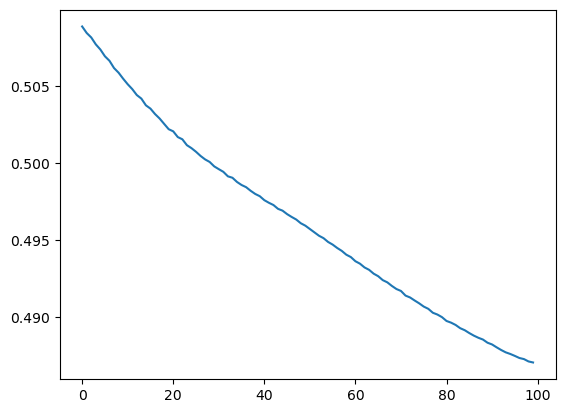

In [3]:
from layers import CrossEntropy, Adam
from data_generators import get_train_test_sorting, get_train_test_addition
from training import make_model, training
''''
import importlib
import training # Importer selve modulen, ikke bare funksjonene
importlib.reload(training)
from training import make_model, training 
'''

n = 100

test_model_1 = make_model(r=5, d=10, m=2, L=2, p=15, k=5)
test_model_2 = make_model(r=7, d=20, m=5, L=2, p=25, k=1)

sorting_data = get_train_test_sorting(5, 2, 250, 10, 10)
trained_model, _ = training(test_model_1, CrossEntropy(), Adam(), sorting_data, 2, n)
_, mean_loss_arr = training(test_model_1, CrossEntropy(), Adam(), sorting_data, 2, n)

trained_model2, _ = training(test_model_2, CrossEntropy(), Adam(), sorting_data, 5, n)
_, mean_loss_arr2 = training(test_model_2, CrossEntropy(), Adam(), sorting_data, 5, n)

iter = np.arange(n)

plt.plot(iter, mean_loss_arr)
plt.show()


In [4]:
test_model_add = make_model(r=6, d=30, m=10, L=3, p=40, k=20)
addition_data = get_train_test_addition(n_digit=2, samples_per_batch=250, n_batches_train=20, n_batches_test=20)

TypeError: get_train_test_addition() missing 1 required positional argument: 'n_digit'